In [2]:
import pymysql
import csv
import pandas as pd

In [3]:
conn = pymysql.connect(host = 'localhost',
                      user = 'root',
                      password = 'apple123',
                      db = 'project1')
cur = conn.cursor()

In [4]:
cur.execute('select * from  category')
results = cur.fetchall()
with open('category.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['categoryid','categoryname'])
    for row in results:
        writer.writerow(row)
csvfile.close()

In [5]:
cur.execute('select * from  customers')
results = cur.fetchall()
with open('customers.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['customerid','firstname','lastname','country'])
    for row in results:
        writer.writerow(row)
csvfile.close()

In [6]:
cur.execute('select * from  orderdetails')
results = cur.fetchall()

with open('orderdetails.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['orderdetailid','orderid','productid','quantity'])
    for row in results:
        writer.writerow(row)
csvfile.close()

In [7]:
cur.execute('select * from  orders')
results = cur.fetchall()
with open('orders.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['orderid','customerid','orderdate','totalorderamount'])
    for row in results:
        writer.writerow(row)
csvfile.close()

In [8]:
cur.execute('select * from  products')
results = cur.fetchall()
cur.close()
with open('products.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['productid','productname','categoryid','saleprice'])
    for row in results:
        writer.writerow(row)
csvfile.close()

In [9]:
df_category = pd.read_csv('category.csv')

In [10]:
df_category

,categoryid,categoryname
0,1001,Home Appliances
1,1002,Electronics


In [11]:
df_orders = pd.read_csv('orders.csv')

In [12]:
df_orders

,orderid,customerid,orderdate,totalorderamount
0,1,988,2024-03-01,689.99
1,2,598,2024-01-26,79.27
2,3,778,2024-05-13,666.75
3,4,683,2023-09-21,316.19
4,5,685,2024-01-25,700.24
...,...,...,...,...
995,996,287,2024-01-03,796.67
996,997,360,2023-11-11,271.88
997,998,279,2023-11-04,594.69
998,999,223,2023-11-05,140.89


In [13]:
df_products = pd.read_csv('products.csv')

In [14]:
df_products

,productid,productname,categoryid,saleprice
0,200,Coffee Maker,1001,334.65
1,201,Air Conditioner,1001,584.96
2,202,Smartwatch,1002,707.00
3,203,Camera,1002,459.81
4,204,Printer,1002,282.40
...,...,...,...,...
995,1195,Coffee Maker,1001,792.59
996,1196,Washing Machine,1001,82.24
997,1197,Heater,1001,421.62
998,1198,Tablet,1002,121.62


In [15]:
df_orderdetails = pd.read_csv('orderdetails.csv')

In [16]:
df_orderdetails

,orderdetailid,orderid,productid,quantity
0,1,224,634,3
1,2,650,442,1
2,3,376,845,3
3,4,857,899,2
4,5,152,699,3
...,...,...,...,...
995,996,439,820,1
996,997,864,808,5
997,998,37,484,5
998,999,854,1153,3


In [17]:
df_customers = pd.read_csv('customers.csv')

In [18]:
df_customers

,customerid,firstname,lastname,country
0,100,Victoria,Larson,Tuvalu
1,101,Mary,Chavez,New Zealand
2,102,Ronald,Brandt,Maldives
3,103,Richard,Joseph,Falkland Islands (Malvinas)
4,104,Cheryl,Downs,Guyana
...,...,...,...,...
995,1095,Michael,Matthews,Israel
996,1096,Brandon,Page,Eritrea
997,1097,Matthew,Avila,France
998,1098,Jacqueline,Cooper,Iran


## Q1. Calculate the total purhcases, total revenue and average purchase value.

In [19]:
total_purchases = sum(df_orderdetails['quantity'])

In [20]:
total_purchases

3053

In [21]:
total_revenue = sum(df_orders['totalorderamount'])

In [22]:
round(total_revenue,2)

489274.72

In [23]:
average_purchase_value = total_revenue/total_purchases

In [24]:
round(average_purchase_value,2)

160.26

## Q2. Identidy top customers and their purchasing behavior.

In [25]:
df_orders

,orderid,customerid,orderdate,totalorderamount
0,1,988,2024-03-01,689.99
1,2,598,2024-01-26,79.27
2,3,778,2024-05-13,666.75
3,4,683,2023-09-21,316.19
4,5,685,2024-01-25,700.24
...,...,...,...,...
995,996,287,2024-01-03,796.67
996,997,360,2023-11-11,271.88
997,998,279,2023-11-04,594.69
998,999,223,2023-11-05,140.89


In [26]:
df_orderdetails

,orderdetailid,orderid,productid,quantity
0,1,224,634,3
1,2,650,442,1
2,3,376,845,3
3,4,857,899,2
4,5,152,699,3
...,...,...,...,...
995,996,439,820,1
996,997,864,808,5
997,998,37,484,5
998,999,854,1153,3


In [27]:
df_merged = df_orders.merge(df_orderdetails, on = 'orderid')

In [28]:
df_sorted_order_amount = df_customers.merge(df_orders[['totalorderamount','customerid']], on = 'customerid').sort_values(by = 'totalorderamount',
                                                                                               ascending = False).head(5)

#### Top 5 customers based on Order Amount

In [29]:
df_sorted_order_amount[['firstname','lastname','country','totalorderamount']].style.hide()

firstname,lastname,country,totalorderamount
Jillian,Baker,Bangladesh,999.980000
Patricia,Taylor,Mauritania,999.440000
Mikayla,Rios,United States of America,998.170000
Matthew,Espinoza,Kiribati,997.450000
Jamie,Montoya,Kenya,996.010000


In [30]:
df_sorted_quantity = df_customers.merge(df_merged[['quantity','customerid']], on = 'customerid').sort_values(by = 'quantity',
                                                                                               ascending = False).head(500)

In [31]:
df_sorted_quantity[['firstname','lastname','country','quantity']].style.hide()

firstname,lastname,country,quantity
Victoria,Larson,Tuvalu,5
Arthur,MD,Sudan,5
Justin,Hurley,Heard Island and McDonald Islands,5
Andrew,Myers,Greenland,5
Omar,Price,Estonia,5
Kathy,Harrison,Chad,5
Jeremy,Green,Barbados,5
Andrew,Logan,Nauru,5
Heather,Estrada,Madagascar,5
Donna,Kim,Canada,5


##### We cannot have top customers by quantity since more than 100 customers had top quantity of 5

## Q3. Analyse Purchase Trends over time(monthly, quarterly, yearly).

In [32]:
df_orders.dtypes

orderid               int64
customerid            int64
orderdate            object
totalorderamount    float64
dtype: object

In [33]:
df_orders['orderdate'] = pd.to_datetime(df_orders['orderdate'])

In [34]:
df_orders.dtypes

orderid                      int64
customerid                   int64
orderdate           datetime64[ns]
totalorderamount           float64
dtype: object

In [35]:
import datetime as dt
import matplotlib.pyplot as plt

In [36]:
df_temp1 = df_orders.copy()

### Purchase trends over Month

In [37]:
df_temp1['month'] = df_temp1['orderdate'].dt.month
mnth = df_temp1.groupby(df_temp1['month'])['totalorderamount'].sum().reset_index()

In [138]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
colors = ['indianred','tan','darkcyan','slateblue']
colors2 = ['peachpuff','darkseagreen']
colors3 = ['cadetblue','plum']

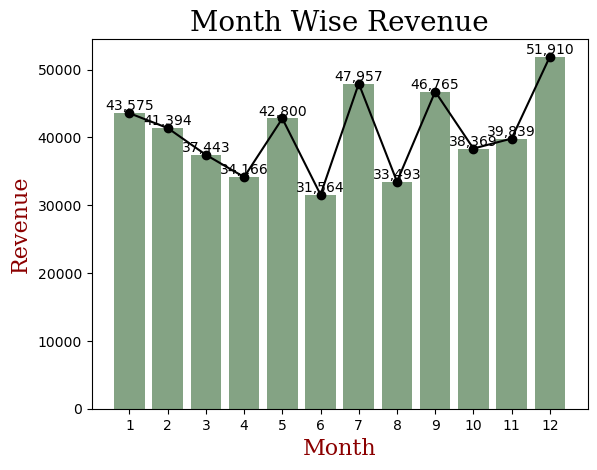

In [129]:

fig, ax = plt.subplots()
bar_container = ax.bar(mnth['month'], mnth['totalorderamount'], color = color)
ax.set_title('Month Wise Revenue', fontdict = font2)
ax.set_xlabel("Month", fontdict = font)
ax.set_ylabel("Revenue", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks(mnth['month'])
plt.plot(mnth['month'], mnth['totalorderamount'], '-o', color='black')
plt.show()

### Purchase trends over Quarter

In [130]:
df_temp1['qtr'] = df_temp1['orderdate'].dt.quarter
qtr = df_temp1.groupby(df_temp1['qtr'])['totalorderamount'].sum().reset_index()

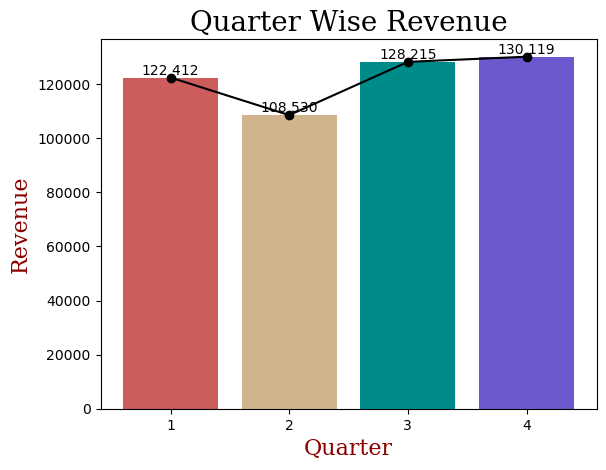

In [137]:
fig, ax = plt.subplots()
bar_container = ax.bar(qtr['qtr'], qtr['totalorderamount'],color = colors)
ax.set_title('Quarter Wise Revenue', fontdict = font2)
ax.set_xlabel("Quarter", fontdict = font)
ax.set_ylabel("Revenue", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks(qtr['qtr'])
plt.plot(qtr['qtr'], qtr['totalorderamount'], '-o', color='black')
plt.show()

### Purchsae trends over Year

In [41]:
df_temp1['year'] = df_temp1['orderdate'].dt.year
year = df_temp1.groupby('year')['totalorderamount'].sum().reset_index()

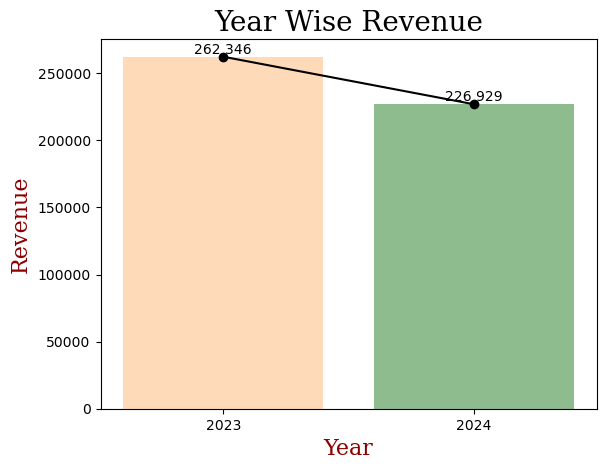

In [133]:
fig, ax = plt.subplots()
bar_container = ax.bar(year['year'], year['totalorderamount'], color= colors2)
ax.set_title('Year Wise Revenue', fontdict = font2)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("Revenue", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
ax.set_xticks(year['year'])
plt.plot(year['year'], year['totalorderamount'], '-o', color='black')
plt.show()

## Q4. Identify top performing product categories.

In [107]:
df_products

,productid,productname,categoryid,saleprice
0,200,Coffee Maker,1001,334.65
1,201,Air Conditioner,1001,584.96
2,202,Smartwatch,1002,707.00
3,203,Camera,1002,459.81
4,204,Printer,1002,282.40
...,...,...,...,...
995,1195,Coffee Maker,1001,792.59
996,1196,Washing Machine,1001,82.24
997,1197,Heater,1001,421.62
998,1198,Tablet,1002,121.62


In [108]:
df = df_orderdetails.merge(df_products)

In [109]:
df2 = df.merge(df_category)

In [110]:
top_category = df2['categoryname'].value_counts()

In [111]:
top_category

categoryname
Home Appliances    506
Electronics        494
Name: count, dtype: int64

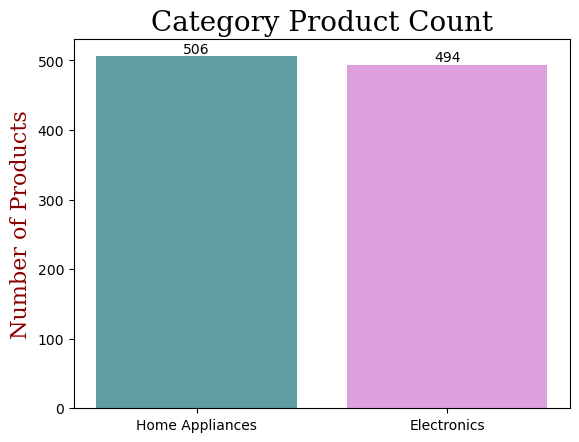

In [139]:
fig, ax = plt.subplots()
bar_container = ax.bar(top_category.index, top_category.values, color = colors3)
ax.set_title('Category Product Count', fontdict = font2)
ax.set_ylabel("Number of Products", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

## Most Selling Products

In [140]:
df_new = df_orderdetails.merge(df_products, on = 'productid')

In [141]:
df_new

,orderdetailid,orderid,productid,quantity,productname,categoryid,saleprice
0,1,224,634,3,Heater,1001,54.96
1,2,650,442,1,Television,1002,477.05
2,3,376,845,3,Heater,1001,757.42
3,4,857,899,2,Coffee Maker,1001,121.93
4,5,152,699,3,Electric Kettle,1001,579.06
...,...,...,...,...,...,...,...
995,996,439,820,1,Washing Machine,1001,401.99
996,997,864,808,5,Camera,1002,527.87
997,998,37,484,5,Printer,1002,568.75
998,999,854,1153,3,Refrigerator,1001,816.81


In [165]:
qt = df_new.groupby("productname").agg({'quantity':'sum'}).sort_values(by = 'quantity', ascending = True)

In [166]:
qt

,quantity
productname,
Blender,105
Smartphone,115
Vacuum Cleaner,133
Camera,136
Headphones,142
Washing Machine,148
Router,148
Coffee Maker,150
Tablet,150


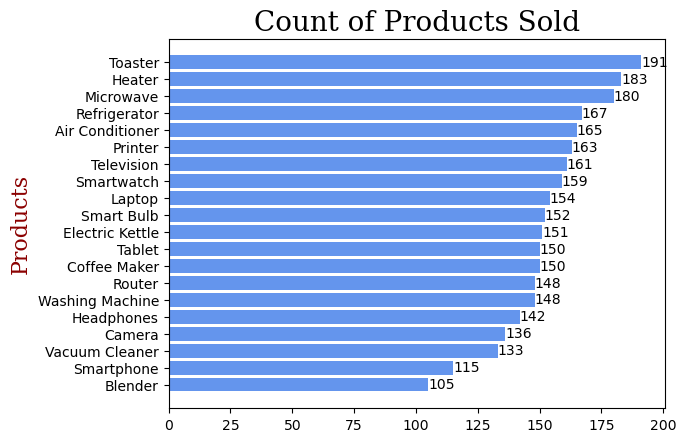

In [169]:
fig, ax = plt.subplots()
bar_container = ax.barh(qt.index, qt['quantity'],color = 'cornflowerblue')
ax.set_title('Count of Products Sold', fontdict = font2)
ax.set_ylabel("Products", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

## Revenue by Category

In [171]:
df_1 = df_orderdetails.merge(df_orders)

In [173]:
df_2 = df_1.merge(df_products)

In [174]:
df_3 = df_2.merge(df_category)

In [176]:
df_sum = df_3.groupby('categoryname').agg({'totalorderamount':'sum'})

In [177]:
df_sum

,totalorderamount
categoryname,
Electronics,248194.56
Home Appliances,241080.16


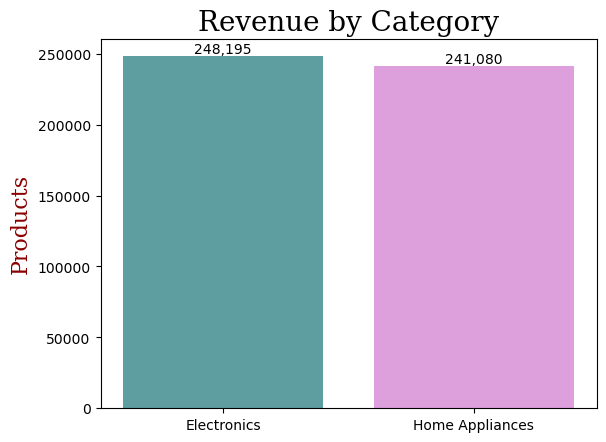

In [181]:
fig, ax = plt.subplots()
bar_container = ax.bar(df_sum.index, df_sum['totalorderamount'],color = colors3)
ax.set_title('Revenue by Category', fontdict = font2)
ax.set_ylabel("Products", fontdict = font)
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()